<img src="../assets/cover_image_PT5.png"/>

# Deep Learning for Natural Language

Copyright, NLP from scratch, 2024.

[NLPfor.me](https://www.nlpfor.me)

------------

## Getting Started with Tensorflow

Before we start applying neural networks to NLP, let's get acquianted with [Tensorflow](https://www.tensorflow.org/) and some of the different building blocks within it. We'll build a toy model first to get familiar with how to do so with code. In this notebook, we'll just be working with simple feed-forward networks as were discussed in the accompanying slides. We will actually be using [Keras](https://keras.io) which is a higher level API that makes working with Tensorflow easier. This has been integrated into TF proper as of version 2.0.

Tensorflow has different model types built into it, for implementing a feed-forward network, this is done using the `Sequential` model type, so called because data flows in the model from left to right.

First, we import this for Tensorflow, and then we will create a new empty Sequential model with nothing it:

In [6]:
from tensorflow.keras.models import Sequential

# Create an empty model
model = Sequential()

We can check the type of our model:

In [7]:
type(model)

keras.src.models.sequential.Sequential

Now that we have an empty model, we can start adding some layers to it! First we will add our input layer. This also needs to be imported from the submodule within Keras. Let's create an input layer for our model that takes 3 columns, then add it to the model. In Keras, this is using the `InputLayer` class:

In [8]:
from tensorflow.keras.layers import InputLayer

# Create the input layer
input_layer = InputLayer(shape=(3,))

# Add to the model
model.add(input_layer)

Great, we're on our way! Now let's add two hidden layers, each with 5 nodes and associated activation functions. Remember the choice of the size of the hidden layers and activation functions is up to the modeler. Finding the best to train your model is part of the work.

In Keras, fully-connected layers are referred to as `Dense` layers, and we can easily specify the activation function by just passing it as a parameter. Here we'll use ReLU which is fairly standard for many applications:

In [9]:
from tensorflow.keras.layers import Dense

# Create hidden layer 1
layer1 = Dense(5, activation="relu")

# Create hidden layer 2
layer2 = Dense(5, activation="relu")

# Add to the model
model.add(layer1)
model.add(layer2)

Great, now let's see how our network is stacking up:

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

We have 3 inputs $\times$ 5 weights in our first layer, plus 5 bias terms for a total of 20 weights, then 5 outputs from layer 1 $\times$ 5 weights = 25 + 5 bias terms for layer 2 for 30 weights. In total, our model has 50 different parameters that can be learned as part of the model training.

Finally, let's add an output layer. For our final layer we will add a single node with a sigmoid activation, so it will return probabilities between 0 and 1:

In [11]:
# Output layer
output_layer = Dense(1, activation="sigmoid")

# Add to model
model.add(output_layer)

Ok, now let's check the result:

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

Now we have 6 extra parameters for a total of 56. Finally, we compile our model and attach a loss function.

In [13]:
# Attach a loss function and optimizier
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build
model.build()

We won't train our model, but let's try passing some data through it:

In [14]:
from tensorflow import ones

# Create a tensor of three 1's
x = ones((1, 3))
print(x)

# Pass through the model
print(model(x))

tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.6319465]], shape=(1, 1), dtype=float32)


Great! We have built a super simple neural network in Tensorflow without training it. Now let's move on to applying this type of neural network to a natural language problem.

## Data Preprocessing

Now we will revisit our original binary classification task for sentiment, so we will again be working with a random 10% sample of the [Large Movie Review Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), a set of 50,000 "highly polar" movie reviews collected from the [Internet Movie Database](https://www.imdb.com).

Before, we tackled this problem with a simple linear classifier in [scikit-learn](https://scikit-learn.org/). Now we will compare and contrast with fitting a deep learning model in Tensorflow based upon what we've seen above.

We still need to go through the same preprocessing steps as before in order to arrive at our document-term matrix and target column vector, these steps have not changed from [Part 3](https://github.com/mylesmharrison/nlp4free/blob/master/notebooks/NLP4Free_Part3_MachineLearningandSentiment.ipynb).

First, we import pandas and read in the data:

In [15]:
import pandas as pd

reviews_df = pd.read_csv('https://raw.githubusercontent.com/nlpfromscratch/datasets/refs/heads/master/imdb/imdb_reviews_sample.csv')

In [16]:
# Take a look
reviews_df.head()

,review,sentiment
0,Valley Girl is an exceptionally well made film...,1
1,This is one of those inoffensive and mildly en...,0
2,I really wanted to like this movie - the locat...,0
3,I attended the premier last night. The movie s...,0
4,The Deadly Wake is THE PERFECT MOVIE for film ...,0


Next, we make a copy of the dataframe, change the review text to lowercase and remove all punctuation:

In [17]:
# Make a copy of the original dataframe
processed_df = reviews_df.copy()

# Change everything to lowercase
processed_df['review'] = processed_df['review'].str.lower()

# Remove punctuation with regular expression (https://en.wikipedia.org/wiki/Regular_expression)
processed_df['review'] = processed_df['review'].str.replace(r'[^\w\s]+', '')

Finally, we apply the CountVectorizer from sklearn to create the document-term matrix:

In [18]:
# Apply count vectorization and remove stopwords
# Use the min_df parameter to only keep tokens which appear in at least 1% of documents (50 reviews or more)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=0.01)
X = cv.fit_transform(reviews_df['review'])
X

<5000x1565 sparse matrix of type '<class 'numpy.int64'>'
	with 269110 stored elements in Compressed Sparse Row format>

Again, this is unchanged from Part 3 and we once again arrive at our 5,000 row, 1,565 column matrix - one row for each movie review, and one column for each token which appears in 1% of the reviews or more (because of the `min_df` parameter). As before, we plunk this into a dataframe:

In [19]:
X = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Check
X.head()

,10,100,11,12,13,15,20,30,40,50,...,wrong,wrote,yeah,year,years,yes,york,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And pull out our `y` column, which here is the binary sentiment column:

In [20]:
y = processed_df['sentiment']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

Note with this section, that even though we are applying a completely different type of machine learning with a deep learning model, the preprocessing steps as part of NLP beforehand are completely unchanged. The advantage here is that we apply the same preprocessing steps to arrive at our document-term matrix and target vector regardless of the type of modeling being applied in supervised learning.

Let us now proceed to fitting our deep learning model.

### Fitting a Deep Learning Model

As with Part 3, we will split our data into a training set and a test set. We can do this easily using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function and set aside 30% of the data for testing:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now, using all the code from the first section together, we will build our model. We will again choose to build a super simple toy model with 2 hidden layers of 5 nodes each. Our output layer is still a single node with sigmoid activation since we are doing binary classification. The only thing that has changed here is that now for our input layer, we have 1,565 input features instead of 3!

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# Create model
model = Sequential()

# Create layers
input_layer = InputLayer(shape=(1565,))
layer1 = Dense(5, activation="relu")
layer2 = Dense(5, activation="relu")
output_layer = Dense(1, activation="sigmoid")

# Add layer
model.add(input_layer)
model.add(layer1)
model.add(layer2)
model.add(output_layer)

# Add loss function and build and compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build()

Great! Now we have our model skeleton laid out. Let's take a look at how this differs from our toy model:

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 5)                   │           7,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,866 (30.73 KB)

 Trainable params: 7,866 (30.73 KB)

 Non-trainable params: 0 (0.00 B)

We can see that this model has 7,866 different parameters to be fit! This is significantly more given the size of our input.

Finally, let's train out model by passing in the dataset.

In [25]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5919 - loss: 0.6745
Epoch 2/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8338 - loss: 0.4730
Epoch 3/3
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9029 - loss: 0.3041


We can see here that even after just a few epochs of training, the model has reached ~90% accuracy! This is being evaluated on the test set, however. Let's evaluate our model against the test set to make sure it is not overfit.

In Tensorflow, we do this by calling `model.evaluate`:

In [26]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9319 - loss: 0.2344
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3427


[0.3525541126728058, 0.8366666436195374]

We can see here that the model has a ~93% accuracy on the training set but only ~84% on the test set, so it may be slightly overfit. Nonetheless, we have a well-performing model for this small dataset after only a few epochs of training.

Unfortunately, unlike an explainable model like Logistic Regression in Part 3, there are no simple coefficients to look at to see which words are most predictive of negative and positive reviews, as in general, neural network approaches are considered a type of [black box model](https://en.wikipedia.org/wiki/Black_box).

We, can however, make predictions, about new reviews sentiment, based on their words. All we need to do is pass them through the same preprocessing steps and then pass that into the model to get predicted probability scores. We must use the same CountVectorizer as before, so the dimensionality of the processed data remains the same:

In [27]:
# Make sample review data
test_reviews = pd.DataFrame(['I hated this movie, absolute worst',
               'I loved this movie, it was the best ever! Highly recommend',
               'Acting was ok, direction was great. Would watch again!'], columns=['review'])

# preprocessing
test_reviews['review'] = test_reviews['review'].str.lower()
test_reviews['review'] = test_reviews['review'].str.replace(r'[^\w\s]+', '')
test_review_dtm = cv.transform(test_reviews['review'])

# score
scores = model.predict(test_review_dtm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Here we get back a score between 0 and 1 for each movie review, which is the probability it is in the positive class (1), *i.e.* the sentiment of the movie review is positive:

In [28]:
scores

array([[0.29199612],
       [0.689222  ],
       [0.5186037 ]], dtype=float32)

Now let's visualize the result with some [matplotlib](https://matplotlib.org/):

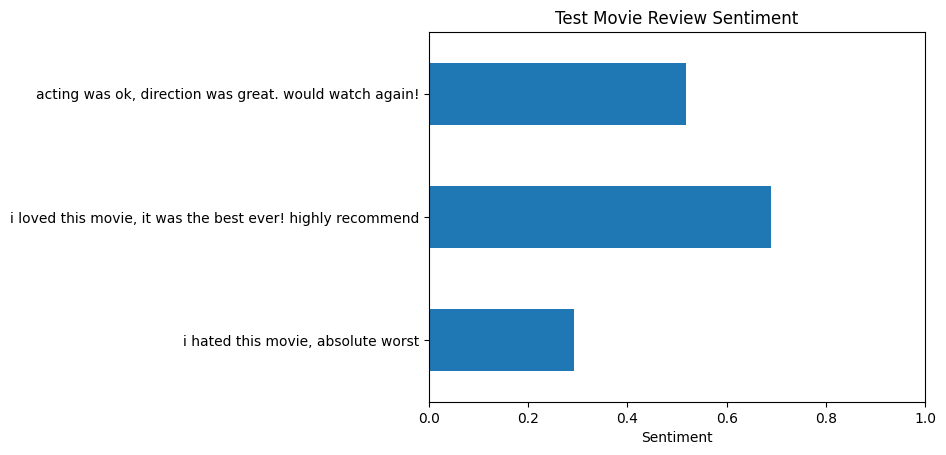

In [29]:
# Plot the result
import matplotlib.pyplot as plt
pd.DataFrame(scores, index=test_reviews['review']).plot(kind='barh', legend=False)
plt.title('Test Movie Review Sentiment')
plt.xlim(0, 1)
plt.ylabel('')
plt.xlabel('Sentiment')
plt.show()

As we can see, the model has assigned low sentiment scores for those reviews we would expect (3). However, even though review 2 appears highly positive, it only assigned a score of ~0.68. Perhaps the model does not assign scores in the high range in general, or these movie reviews are too short compared to the data the model was trained on.

There you have it, deep learning for an NLP task in Tensorflow, without too much code at all! This just a simple example and we've only scratched the surface, but the same principles can be applied to more complex tasks with natural language, even forming the basis for state of the art NLP such as large language models (LLMs).

<div align="right" float="right"><a href="https://www.github.com/nlpfromscratch/nlpfor.me" style="float: right; text-align: right; text-decoration: none; color: black">NLPfor.me 🔠⚡🤖🧠😃</a>